In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import georinex as gr
import numpy as np
import pandas as pd
import os
from utils import *
from os.path import isfile, join
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
X_static = parse_rinex('static')
X_kinematic = parse_rinex('kinematic')
X_natural = parse_rinex('natural')

Parsing ublox_static_interference.obs
Parsing novatel_static_interference.rnx
Parsing novatel_kinematic_interference.rnx
Parsing ublox_kinematic_interference.rnx
Parsing sony_kinematic_urban.rnx
Parsing sony_static_ionosphere.rnx
Parsing sony_kinematic_highway.rnx


In [8]:
X_s, y_s = prepare_train_data('static', X_static, 5)
X_k, y_k = prepare_train_data('kinematic', X_kinematic, 5)
X_n, y_n = prepare_train_data('natural', X_natural, 5)

In [9]:
# Merge data:
X_data = {}
y_data = {}
for constell in ['G', 'E']:
    X_data[constell] = X_s[constell] + X_k[constell] + X_n[constell]
    y_data[constell] = y_s[constell] + y_k[constell] + y_n[constell]
X = stack_features(X_data)
y = stack_target(y_data)

In [10]:
# Train models for each constellation:
models = build_models(X, y, lr=0.001, epoch=200, batch=100, lstm=256)


Epoch 1/200
8654/8654 [==============================] - 4s 471us/step - loss: 0.3365 - accuracy: 0.8448
Epoch 2/200
8654/8654 [==============================] - 2s 270us/step - loss: 0.2903 - accuracy: 0.8476
Epoch 3/200
8654/8654 [==============================] - 2s 281us/step - loss: 0.2853 - accuracy: 0.8512
Epoch 4/200
8654/8654 [==============================] - 3s 329us/step - loss: 0.2804 - accuracy: 0.8526
Epoch 5/200
8654/8654 [==============================] - 3s 299us/step - loss: 0.2783 - accuracy: 0.8542
Epoch 6/200
8654/8654 [==============================] - 4s 442us/step - loss: 0.2794 - accuracy: 0.8475
Epoch 7/200
8654/8654 [==============================] - 3s 352us/step - loss: 0.2766 - accuracy: 0.8553
Epoch 8/200
8654/8654 [==============================] - 2s 275us/step - loss: 0.2740 - accuracy: 0.8563
Epoch 9/200
8654/8654 [==============================] - 2s 285us/step - loss: 0.2733 - accuracy: 0.8553
Epoch 10/200
8654/8654 [==============================

8654/8654 [==============================] - 3s 303us/step - loss: 0.1862 - accuracy: 0.9052
Epoch 77/200
8654/8654 [==============================] - 3s 303us/step - loss: 0.1858 - accuracy: 0.9013
Epoch 78/200
8654/8654 [==============================] - 3s 305us/step - loss: 0.1880 - accuracy: 0.9046
Epoch 79/200
8654/8654 [==============================] - 3s 297us/step - loss: 0.1986 - accuracy: 0.9003
Epoch 80/200
8654/8654 [==============================] - 3s 299us/step - loss: 0.1984 - accuracy: 0.8987
Epoch 81/200
8654/8654 [==============================] - 3s 301us/step - loss: 0.1905 - accuracy: 0.9036
Epoch 82/200
8654/8654 [==============================] - 3s 302us/step - loss: 0.1835 - accuracy: 0.9064
Epoch 83/200
8654/8654 [==============================] - 3s 304us/step - loss: 0.1813 - accuracy: 0.9073
Epoch 84/200
8654/8654 [==============================] - 3s 302us/step - loss: 0.1850 - accuracy: 0.9049
Epoch 85/200
8654/8654 [==============================] - 3

8654/8654 [==============================] - 3s 304us/step - loss: 0.1601 - accuracy: 0.9173
Epoch 153/200
8654/8654 [==============================] - 2s 287us/step - loss: 0.1583 - accuracy: 0.9178
Epoch 154/200
8654/8654 [==============================] - 2s 288us/step - loss: 0.1553 - accuracy: 0.9236
Epoch 155/200
8654/8654 [==============================] - 2s 286us/step - loss: 0.1546 - accuracy: 0.9185
Epoch 156/200
8654/8654 [==============================] - 2s 282us/step - loss: 0.1547 - accuracy: 0.9188
Epoch 157/200
8654/8654 [==============================] - 2s 279us/step - loss: 0.1551 - accuracy: 0.9189
Epoch 158/200
8654/8654 [==============================] - 3s 302us/step - loss: 0.1568 - accuracy: 0.9204
Epoch 159/200
8654/8654 [==============================] - 3s 298us/step - loss: 0.1564 - accuracy: 0.9204
Epoch 160/200
8654/8654 [==============================] - 2s 280us/step - loss: 0.1554 - accuracy: 0.9199
Epoch 161/200
8654/8654 [==========================

5001/5001 [==============================] - 1s 287us/step - loss: 0.4137 - accuracy: 0.7706
Epoch 30/200
5001/5001 [==============================] - 1s 278us/step - loss: 0.4132 - accuracy: 0.7726
Epoch 31/200
5001/5001 [==============================] - 1s 298us/step - loss: 0.4134 - accuracy: 0.7726
Epoch 32/200
5001/5001 [==============================] - 2s 310us/step - loss: 0.4125 - accuracy: 0.7718
Epoch 33/200
5001/5001 [==============================] - 1s 277us/step - loss: 0.4119 - accuracy: 0.7724
Epoch 34/200
5001/5001 [==============================] - 1s 278us/step - loss: 0.4115 - accuracy: 0.7726
Epoch 35/200
5001/5001 [==============================] - 1s 277us/step - loss: 0.4083 - accuracy: 0.7754
Epoch 36/200
5001/5001 [==============================] - 1s 283us/step - loss: 0.4093 - accuracy: 0.7752
Epoch 37/200
5001/5001 [==============================] - 1s 278us/step - loss: 0.4086 - accuracy: 0.7758
Epoch 38/200
5001/5001 [==============================] - 1

5001/5001 [==============================] - 1s 269us/step - loss: 0.3503 - accuracy: 0.8120
Epoch 107/200
5001/5001 [==============================] - 1s 263us/step - loss: 0.3514 - accuracy: 0.8128
Epoch 108/200
5001/5001 [==============================] - 1s 256us/step - loss: 0.3609 - accuracy: 0.8108
Epoch 109/200
5001/5001 [==============================] - 1s 258us/step - loss: 0.3669 - accuracy: 0.8084
Epoch 110/200
5001/5001 [==============================] - 1s 255us/step - loss: 0.4616 - accuracy: 0.7736
Epoch 111/200
5001/5001 [==============================] - 1s 255us/step - loss: 0.3885 - accuracy: 0.7932
Epoch 112/200
5001/5001 [==============================] - 1s 247us/step - loss: 0.3778 - accuracy: 0.7980
Epoch 113/200
5001/5001 [==============================] - 1s 254us/step - loss: 0.3810 - accuracy: 0.7976
Epoch 114/200
5001/5001 [==============================] - 1s 253us/step - loss: 0.3746 - accuracy: 0.8000
Epoch 115/200
5001/5001 [==========================

5001/5001 [==============================] - 1s 261us/step - loss: 0.3054 - accuracy: 0.8366
Epoch 183/200
5001/5001 [==============================] - 1s 253us/step - loss: 0.3352 - accuracy: 0.8268
Epoch 184/200
5001/5001 [==============================] - 1s 257us/step - loss: 0.3100 - accuracy: 0.8362
Epoch 185/200
5001/5001 [==============================] - 1s 258us/step - loss: 0.3113 - accuracy: 0.8362
Epoch 186/200
5001/5001 [==============================] - 1s 273us/step - loss: 0.3100 - accuracy: 0.8342
Epoch 187/200
5001/5001 [==============================] - 1s 262us/step - loss: 0.3203 - accuracy: 0.8306
Epoch 188/200
5001/5001 [==============================] - 1s 262us/step - loss: 0.3041 - accuracy: 0.8360
Epoch 189/200
5001/5001 [==============================] - 1s 269us/step - loss: 0.2989 - accuracy: 0.8424
Epoch 190/200
5001/5001 [==============================] - 1s 265us/step - loss: 0.3231 - accuracy: 0.8280
Epoch 191/200
5001/5001 [==========================

In [12]:
save_models(models)

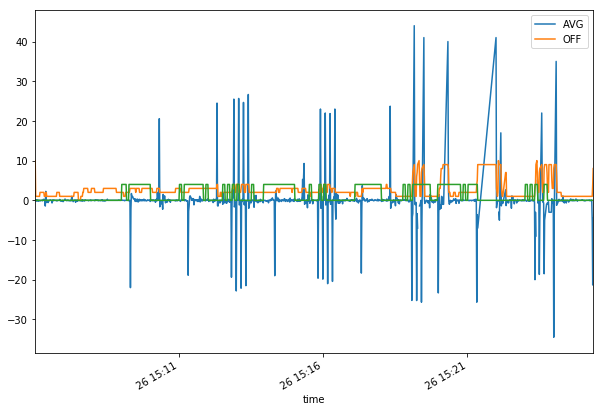

In [14]:
predict = []
for d in models['G'].predict(X_data['G'][0]):
    for _ in range(5):
        predict.append(np.round(d[0])*4)
c = get_features(X_static['G'][0])
c.plot(figsize=(10, 7))
plt.plot(c.index[:len(predict)], predict)

In [31]:
X_test = parse_rinex('test', 'Dataset3.rnx')

Parsing Dataset3.rnx


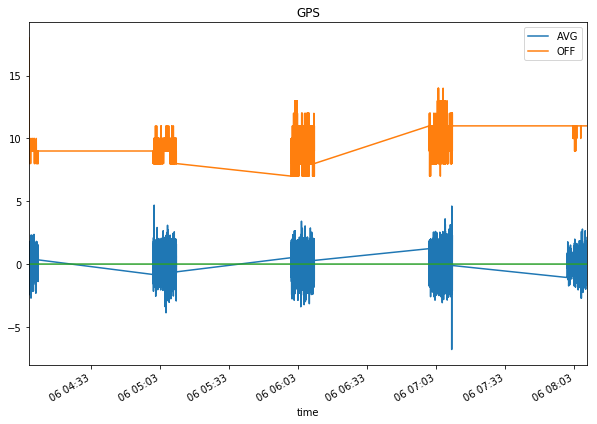

In [32]:
X_t = prepare_test_data('test', X_test, 5)
predict = []
for d in models['G'].predict(X_t['G'][0]):
    for _ in range(5):
        predict.append(np.round(d[0])*10)
c = get_features(X_test['G'][0])
c.plot(figsize=(10, 7), title='GPS')
plt.plot(c.index[:len(predict)], predict)

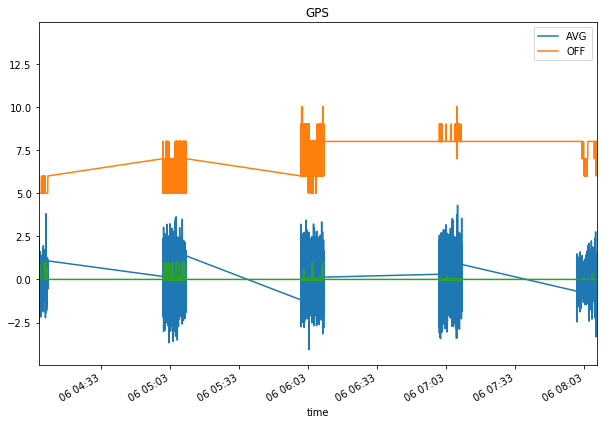

In [35]:
X_t = prepare_test_data('test', X_test, 5)
predict = []
for d in models['E'].predict(X_t['E'][0]):
    for _ in range(5):
        predict.append(d[0])
c = get_features(X_test['E'][0])
c.plot(figsize=(10, 7), title='GPS')
plt.plot(c.index[:len(predict)], predict)